In [366]:
import pandas as pd

In [367]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Algorithms/Naive Bayes/Copy of diabetes.csv")

In [368]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [370]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [371]:
df.corr()["Outcome"]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [372]:
df = df.drop_duplicates()

In [373]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [374]:
from sklearn.model_selection import train_test_split as tts

In [375]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [376]:
y_train.value_counts()

,count
Outcome,
0,393
1,221


In [377]:
from imblearn.over_sampling import SMOTE

In [378]:
sm = SMOTE()
x_resample, y_resample = sm.fit_resample(x_train, y_train)

In [379]:
y_resample.value_counts()

,count
Outcome,
1,393
0,393


In [380]:
from sklearn.preprocessing import StandardScaler

In [381]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_resample = ss.fit_transform(x_resample)

In [382]:
from sklearn.naive_bayes import GaussianNB

In [383]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [384]:
y_pred = gnb.predict(x_test)

In [385]:
import sklearn.metrics as sm

In [386]:
sm.accuracy_score(y_test, y_pred)

0.7662337662337663

In [387]:
cm = sm.confusion_matrix(y_test, y_pred)

In [388]:
y_train.value_counts()

,count
Outcome,
0,393
1,221


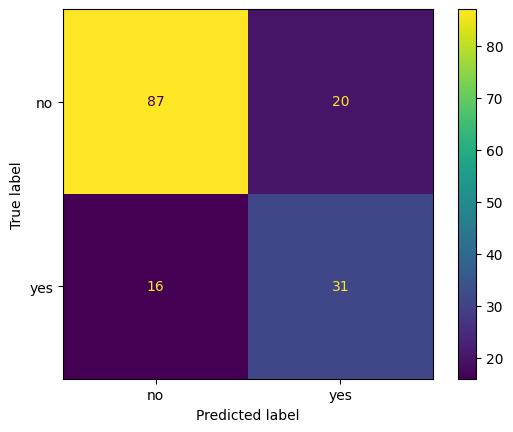

In [389]:
sm.ConfusionMatrixDisplay(cm, display_labels = ["no", "yes"]).plot()

In [390]:
sm.mean_squared_error(y_test, y_pred)

0.23376623376623376

In [391]:
sm.precision_score(y_test, y_pred)

0.6078431372549019

In [392]:
sm.recall_score(y_test, y_pred)

0.6595744680851063

In [393]:
from sklearn.naive_bayes import BernoulliNB

In [394]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [395]:
y_pred02 = bnb.predict(x_test)

In [396]:
sm.accuracy_score(y_test, y_pred02)

0.7662337662337663

In [397]:
from sklearn.naive_bayes import MultinomialNB

In [398]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)